# Importação das bibliotecas

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, learning_curve, GridSearchCV
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.pipeline import make_pipeline


# Leitura da Base

In [58]:
df = pd.read_csv("/content/drive/MyDrive/PCD1/assets/data/bases_modificadas/State_of_Data_dados_tratados.csv")

# Definição do Atributo alvo

In [59]:
y_numeric = df['progressao_prejudicada']
X= df.drop('progressao_prejudicada', axis=1)

# Balanceamento com Smote

In [60]:
# 2. Definir a variável alvo e remover registros onde ela é nula
TARGET_COLUMN = 'progressao_prejudicada'

# 6. Aplicar o SMOTE
print("Aplicando SMOTE para balancear as classes...")
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y_numeric)

print("SMOTE concluído.")
print("-" * 50)



Aplicando SMOTE para balancear as classes...
SMOTE concluído.
--------------------------------------------------


Gerando dados para a Curva de Aprendizagem... Isso pode levar alguns minutos.
Cálculo concluído.
--------------------------------------------------
Gráfico salvo como 'curva_de_aprendizagem.png'


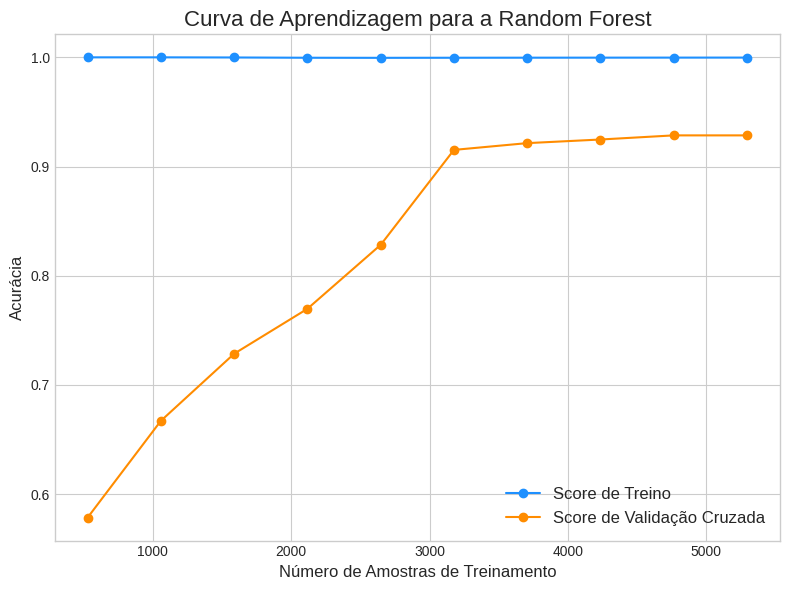

In [61]:
# --- 2. Geração da Curva de Aprendizagem ---

# Inicializar o modelo que será avaliado.
# Usaremos uma profundidade de 6, que é um bom ponto de partida para complexidade moderada.
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42
)

print("Gerando dados para a Curva de Aprendizagem... Isso pode levar alguns minutos.")

# Usar a função learning_curve do scikit-learn
# Ela treina o modelo em diferentes subconjuntos dos dados (de 10% a 100%)
# e calcula os scores usando validação cruzada (cv=5).
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_model,
    X=X,
    y=y,
    cv=5, # Número de folds da validação cruzada
    n_jobs=-1, # Usar todos os processadores para acelerar
    train_sizes=np.linspace(0.1, 1.0, 10), # 10 passos de 10% a 100% dos dados(tamanho do passo em proporção ao total(Ex:0.1, 1.0 vai ser 10% logo, vai de 10% em 10% do total), total de linhas ,numero de pontos)
    scoring='accuracy' # Métrica de avaliação
)

# Calcular a média e o desvio padrão dos scores para cada tamanho de treino
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print("Cálculo concluído.")
print("-" * 50)


# --- 3. Plotagem do Gráfico ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(8, 6))#largura e altura do grafico

# Plotar a média da acurácia de treino e teste
plt.plot(train_sizes, train_scores_mean, 'o-', color='dodgerblue', label='Score de Treino')
plt.plot(train_sizes, test_scores_mean, 'o-', color='darkorange', label='Score de Validação Cruzada')

# Plotar a área de desvio padrão (a "incerteza" da performance)
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.1, color='dodgerblue')
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.1, color='darkorange')

plt.title('Curva de Aprendizagem para a Random Forest', fontsize=16)
plt.xlabel('Número de Amostras de Treinamento', fontsize=12)
plt.ylabel('Acurácia', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Salvar o gráfico
plt.savefig('curva_de_aprendizagem.png')
print("Gráfico salvo como 'curva_de_aprendizagem.png'")

# Exibir o gráfico
plt.show()

Gerando dados para a Curva de Aprendizagem... Isso pode levar alguns minutos.
Cálculo concluído.
--------------------------------------------------
Gráfico salvo como 'curva_de_aprendizagem.png'


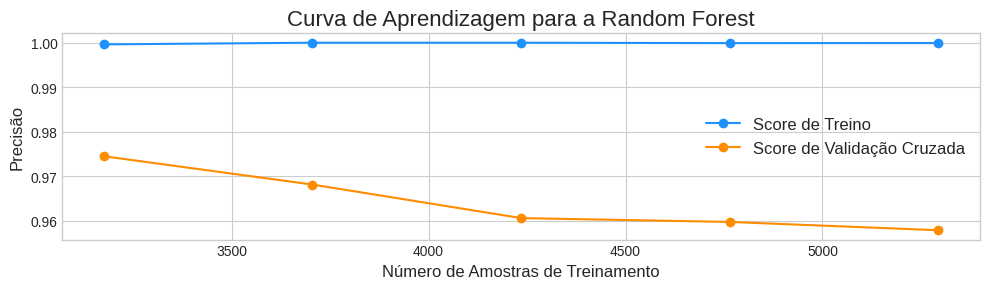

In [62]:
# --- 2. Geração da Curva de Aprendizagem ---

print("Gerando dados para a Curva de Aprendizagem... Isso pode levar alguns minutos.")

# Usar a função learning_curve do scikit-learn
# Ela treina o modelo em diferentes subconjuntos dos dados (de 10% a 100%)
# e calcula os scores usando validação cruzada (cv=5).
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_model,
    X=X,
    y=y,
    cv=5, # Número de folds da validação cruzada
    n_jobs=-1, # Usar todos os processadores para acelerar
    train_sizes=np.linspace(0.1, 1.0, 10), # 10 passos de 10% a 100% dos dados(tamanho do passo em proporção ao total(Ex:0.1, 1.0 vai ser 10% logo, vai de 10% em 10% do total), total de linhas ,numero de pontos)
    scoring='precision' # Métrica de avaliação
)

# Calcular a média e o desvio padrão dos scores para cada tamanho de treino
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

print("Cálculo concluído.")
print("-" * 50)


# --- 3. Plotagem do Gráfico ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 3))#largura e altura do grafico

# Plotar a média da acurácia de treino e teste
plt.plot(train_sizes, train_scores_mean, 'o-', color='dodgerblue', label='Score de Treino')
plt.plot(train_sizes, test_scores_mean, 'o-', color='darkorange', label='Score de Validação Cruzada')

# Plotar a área de desvio padrão (a "incerteza" da performance)
# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.1, color='dodgerblue')
# plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                  test_scores_mean + test_scores_std, alpha=0.1, color='darkorange')

plt.title('Curva de Aprendizagem para a Random Forest', fontsize=16)
plt.xlabel('Número de Amostras de Treinamento', fontsize=12)
plt.ylabel('Precisão', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.tight_layout()

# Salvar o gráfico
plt.savefig('curva_de_aprendizagem.png')
print("Gráfico salvo como 'curva_de_aprendizagem.png'")

# Exibir o gráfico
plt.show()

# Separação em treino e teste

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y
)

Cross Validation com Grid SearchCV

In [64]:
"""# Otimização com Grid Search"""

# Definir a grade de parâmetros para o Grid Search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inicializar o modelo RandomForest
rf_model = RandomForestClassifier(random_state=42)

# Inicializar o GridSearchCV
print("Iniciando Grid Search para encontrar os melhores hiperparâmetros...")
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=-1, # Usar todos os processadores
    verbose=2
)

# Executar o Grid Search nos dados de treino
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros encontrados
print("\nGrid Search concluído.")
print(f"Melhores parâmetros encontrados: {grid_search.best_params_}")
print("-" * 50)

# Atribuir o melhor modelo encontrado pelo Grid Search
rf_model = grid_search.best_estimator_

Iniciando Grid Search para encontrar os melhores hiperparâmetros...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Grid Search concluído.
Melhores parâmetros encontrados: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
--------------------------------------------------


Acurácia treino: 0.9934222222222222

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2813
         1.0       1.00      0.99      0.99      2812

    accuracy                           0.99      5625
   macro avg       0.99      0.99      0.99      5625
weighted avg       0.99      0.99      0.99      5625



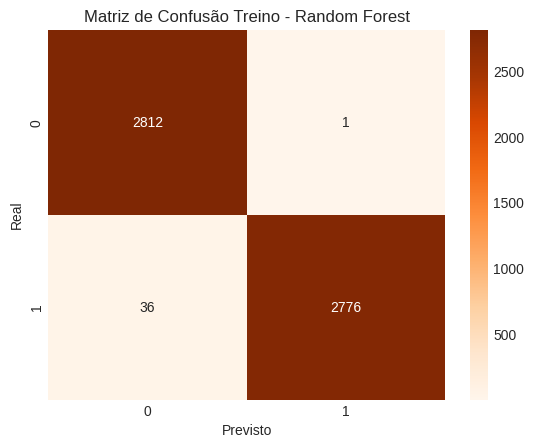

Acurácia teste: 0.9486404833836858

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       496
         1.0       0.95      0.94      0.95       497

    accuracy                           0.95       993
   macro avg       0.95      0.95      0.95       993
weighted avg       0.95      0.95      0.95       993



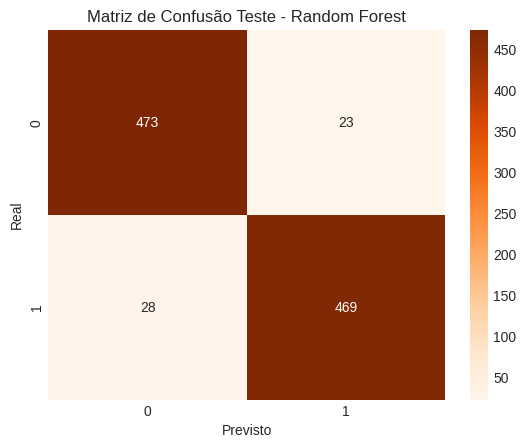

In [65]:
y_pred_tr = rf_model.predict(X_train)

print("Acurácia treino:", accuracy_score(y_train, y_pred_tr))
print("\nRelatório de Classificação:\n", classification_report(y_train, y_pred_tr))

# Matriz de Confusão de treino
cm = confusion_matrix(y_train, y_pred_tr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão Treino - Random Forest")
plt.show()



y_pred_te = rf_model.predict(X_test)

print("Acurácia teste:", accuracy_score(y_test, y_pred_te))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_te))

# Matriz de Confusão de treino
cm = confusion_matrix(y_test, y_pred_te)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão Teste - Random Forest")
plt.show()

As 20 Features Mais Importantes:
                                              Feature  Importance
4                                    Genero_Masculino    0.148673
3                                     Genero_Feminino    0.137526
6                               Cor/raca/etnia_Branca    0.059379
11                               Cor/raca/etnia_Preta    0.050836
17                           Regiao onde mora_Sudeste    0.028329
0                                               Idade    0.028147
18                               Regiao onde mora_Sul    0.027986
59               Setor_Tecnologia/Fábrica de Software    0.025925
9                                Cor/raca/etnia_Parda    0.023806
87  Forma de Trabalho_Modelo híbrido flexível (o f...    0.019952
28  Area de Formação_Computação / Engenharia de So...    0.019258
65               Cargo_Analista de Dados/Data Analyst    0.018853
84           Forma de Trabalho_Modelo 100% presencial    0.018694
47                           Setor_Finanças

<ipython-input-66-3723966117>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Gráfico salvo como 'feature_importance.png'


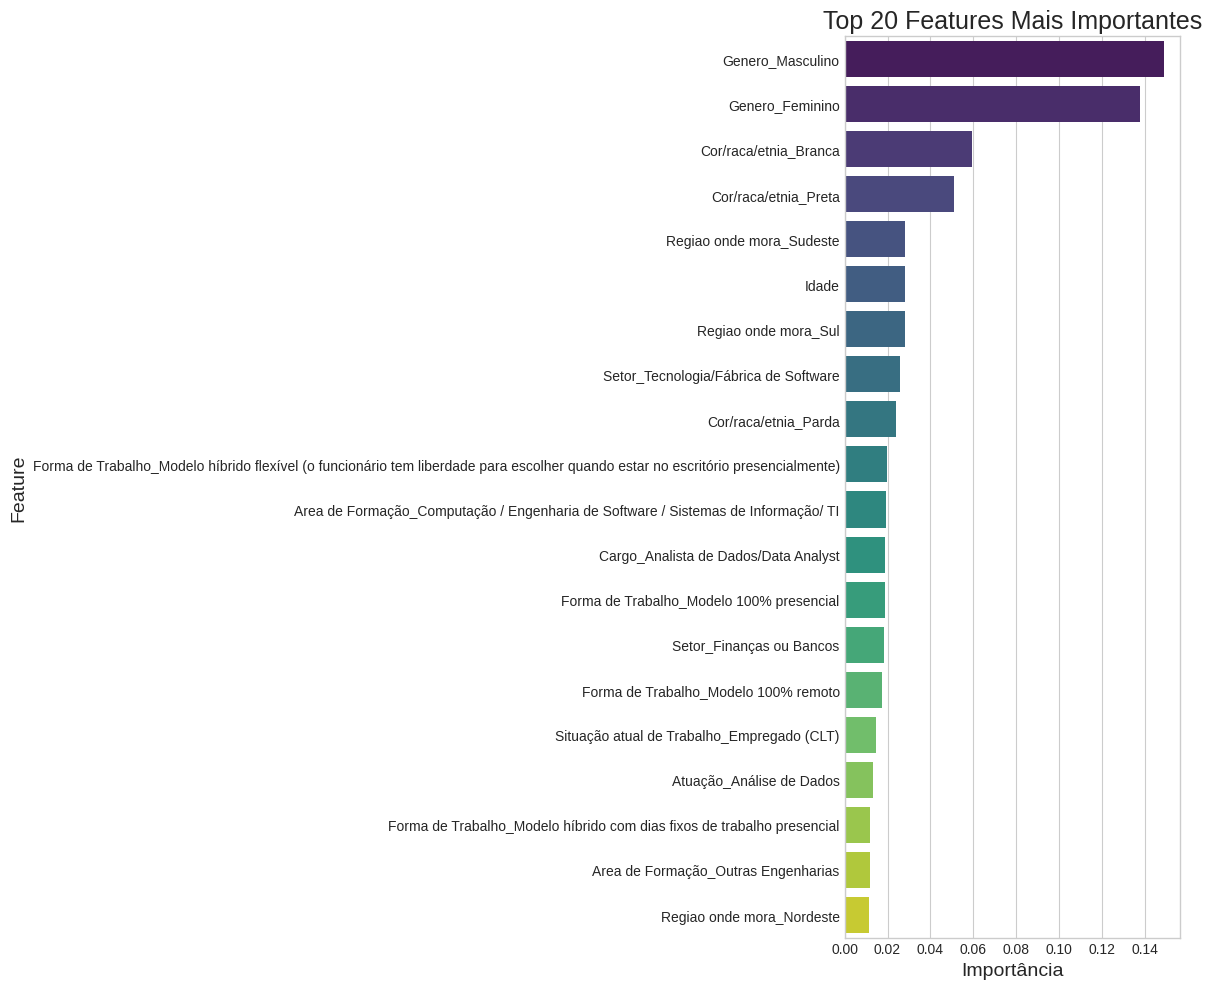

In [66]:
# --- 3. Extração e Preparação da Feature Importance ---
# O modelo treinado possui o atributo .feature_importances_
importances = rf_model.feature_importances_

# Criar um DataFrame para visualizar as importâncias
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Ordenar o DataFrame pela importância em ordem decrescente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Selecionar as 20 features mais importantes para o gráfico (para não ficar muito poluído)
top_20_features = feature_importance_df.head(20)

print("As 20 Features Mais Importantes:")
print(top_20_features)
print("-" * 50)


# --- 4. Geração do Gráfico de Feature Importance ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 10))

# Criar um gráfico de barras horizontal
sns.barplot(
    x='Importance',
    y='Feature',
    data=top_20_features,
    palette='viridis' # Escolha de uma paleta de cores
)

plt.title('Top 20 Features Mais Importantes', fontsize=18)
plt.xlabel('Importância', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout() # Ajusta o layout para evitar que os rótulos se sobreponham

# Salvar o gráfico
plt.savefig('feature_importance.png')
print("Gráfico salvo como 'feature_importance.png'")

# Exibir o gráfico
plt.show()
